# Exploratory Data Analysis: Movies Dataset

This notebook performs an essential EDA on the `movies-raw.csv` dataset to prepare it for the recommendation engine. We will explore the data structure, missing values, distributions, and key features.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

## 1. Load and Inspect Data

In [33]:
df = pd.read_csv("movies-processed.csv", keep_default_na=False)
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (12329, 13)


,id,title,release_date,vote_average,vote_count,popularity,genres,runtime,director,main_cast,poster_path,score,search_metadata
0,43727,Jolene,2010-10-29,6.256,117,3.7161,Drama,121,Dan Ireland,"Jessica Chastain, Frances Fisher, Rupert Frien...",/5udqbFUVTzevHpDkel4CElpNEBR.jpg,30.217013,plot: a teenage orphan spends ten years travel...
1,26390,Brooklyn's Finest,2010-03-04,6.304,952,3.6838,"Crime, Drama, Thriller",132,Antoine Fuqua,"Richard Gere, Don Cheadle, Ethan Hawke, Wesley...",/9ZyJJpMsc3bF8gduDaxo0zo1gwK.jpg,43.611392,plot: enforcing the law within the notoriously...
2,37659,When You're Strange,2010-04-09,7.311,220,1.0303,"Documentary, Music",86,Tom DiCillo,"Johnny Depp, Jim Morrison, John Densmore, Ray ...",/yd5X8f1mt13ETAWLI7dp0MEEZLL.jpg,39.568998,plot: the creative chemistry of four brilliant...
3,8952,I Love You Phillip Morris,2010-02-04,6.400,1755,1.6778,"Comedy, Crime, Drama, Romance",98,John Requa,"Jim Carrey, Ewan McGregor, Leslie Mann, Rodrig...",/qtAuWLGQ7N4PNQ6boZeqqoUY2l9.jpg,47.980860,plot: steven russell leads a seemingly average...
4,15004,His Name Was Jason: 30 Years of Friday the 13th,2010-04-20,6.703,86,0.5094,Documentary,90,Daniel Farrands,"Diane Almeida, Erich Anderson, Judie Aronson, ...",/1YyPmtz41mXO0A2ztsn3Ibe6ssF.jpg,29.985922,plot: a retrospective documentary about the gr...


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12329 entries, 0 to 12328
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               12329 non-null  int64  
 1   title            12329 non-null  object 
 2   release_date     12329 non-null  object 
 3   vote_average     12329 non-null  float64
 4   vote_count       12329 non-null  int64  
 5   popularity       12329 non-null  float64
 6   genres           12329 non-null  object 
 7   runtime          12329 non-null  int64  
 8   director         12329 non-null  object 
 9   main_cast        12329 non-null  object 
 10  poster_path      12329 non-null  object 
 11  score            12329 non-null  float64
 12  search_metadata  12329 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 1.2+ MB


## 2. Missing Values Analysis

In [35]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("No Missing Values")

No Missing Values


## 3. Numerical Features Distribution

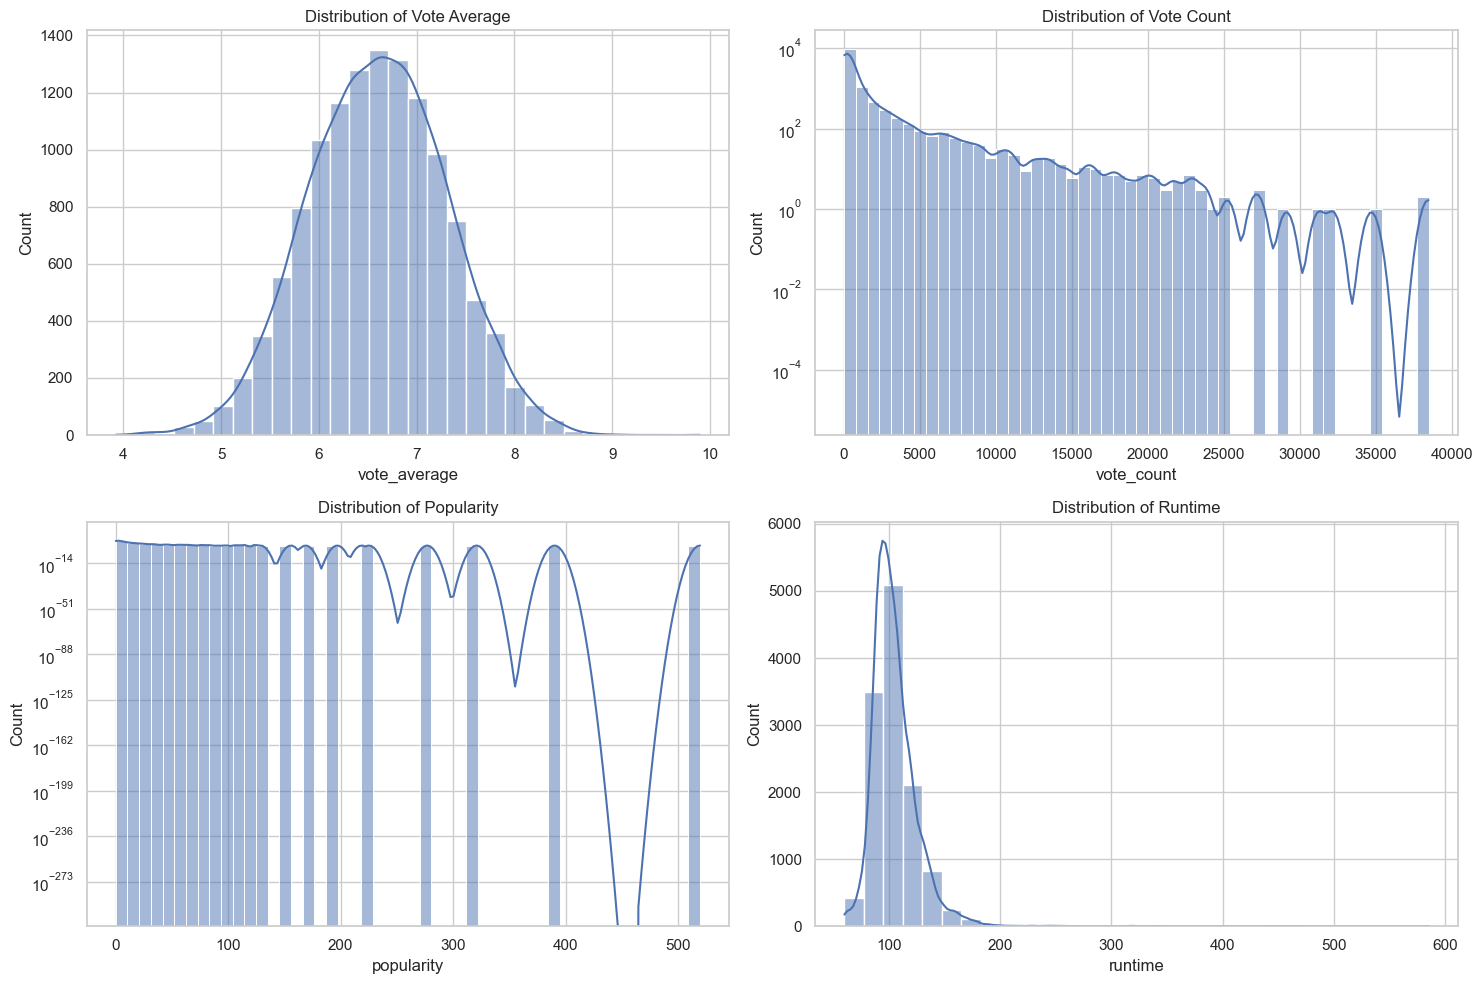

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(df['vote_average'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Vote Average')

sns.histplot(df['vote_count'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Vote Count')
axes[0, 1].set_yscale('log')

sns.histplot(df['popularity'], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Popularity')
axes[1, 0].set_yscale('log')

sns.histplot(df['runtime'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Runtime')

plt.tight_layout()
plt.show()

## 4. Genre Analysis
Since genres are comma-separated strings, we need to explode them to count occurrences.

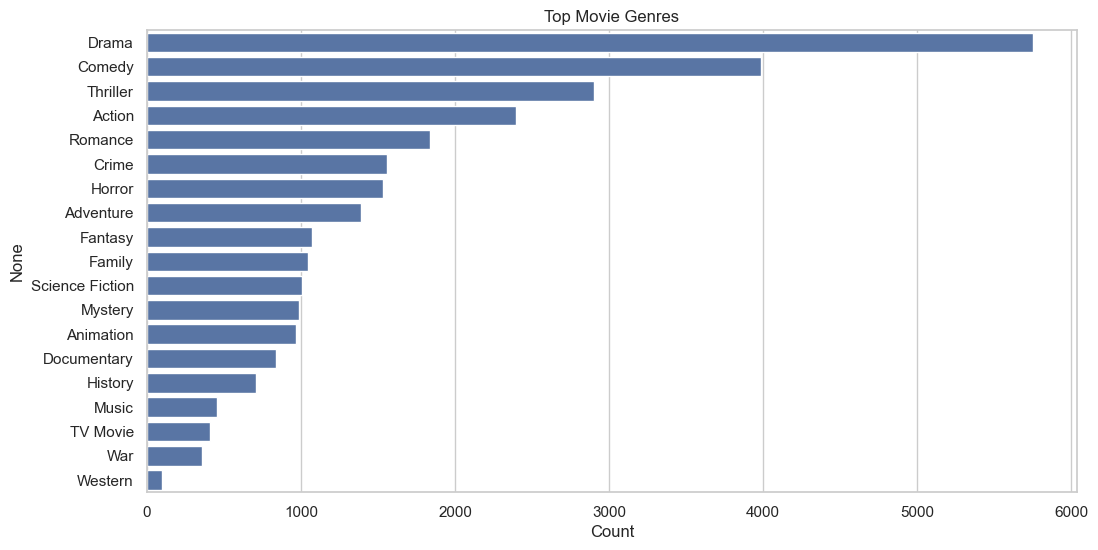

In [42]:
genres_series = df['genres'].str.split(', ')
all_genres = [genre for sublist in genres_series for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top Movie Genres')
plt.xlabel('Count')
plt.show()

## 5. Temporal Analysis (Release Year)

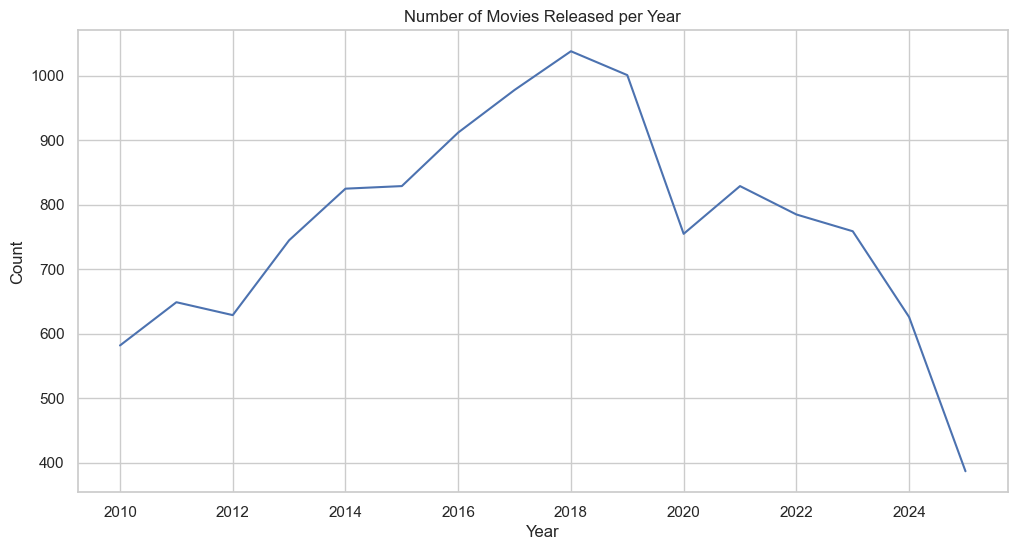

In [38]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

plt.figure(figsize=(12, 6))
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

## 6. Correlation Analysis

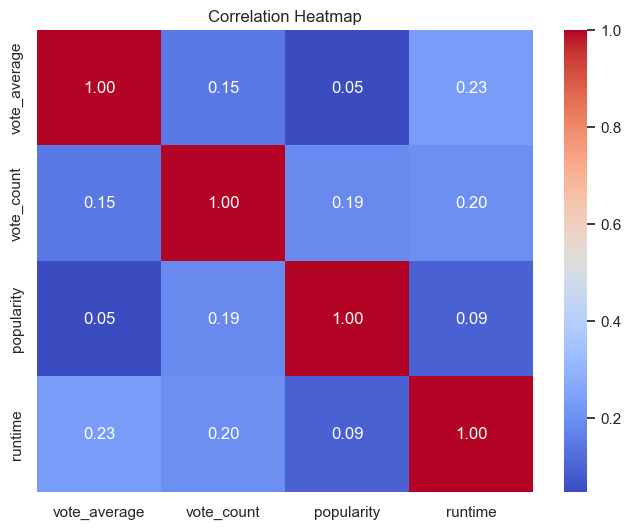

In [39]:
corr_matrix = df[['vote_average', 'vote_count', 'popularity', 'runtime']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 7. Text Features (Overview Length)
The overview is crucial for semantic search. Let's see its length distribution.

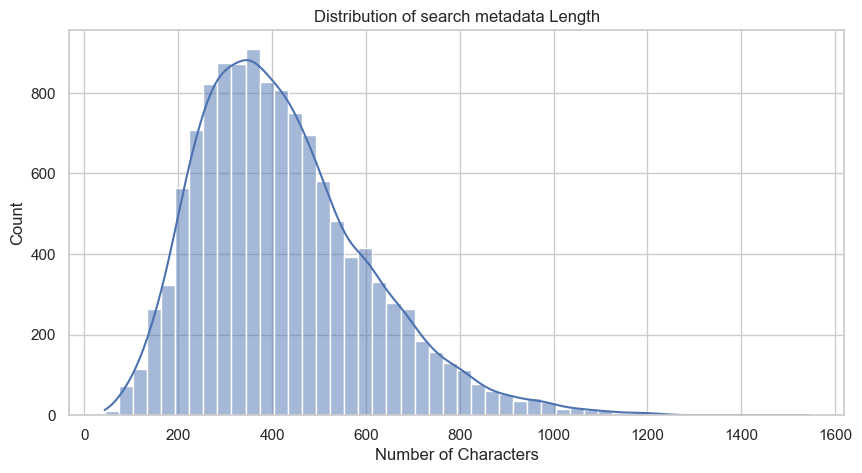

In [40]:
df['overview_len'] = df['search_metadata'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(df['overview_len'], bins=50, kde=True)
plt.title('Distribution of search metadata Length')
plt.xlabel('Number of Characters')
plt.show()

## Distribution of Score

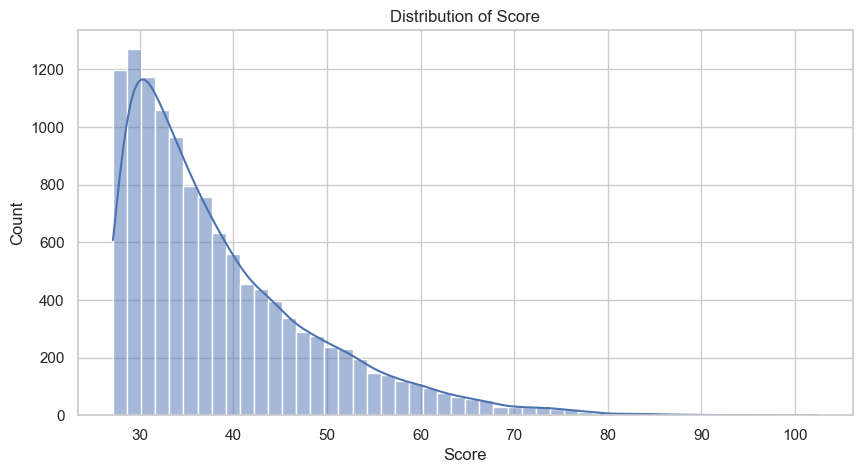

In [41]:
plt.figure(figsize=(10, 5))
sns.histplot(df, x=df["score"], bins=50, kde=True)
plt.title("Distribution of Score")
plt.xlabel("Score")
plt.show()